<a href="https://colab.research.google.com/github/sftSalman/tensorflowBasic/blob/main/FMINST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras 

In [2]:
fminst = tf.keras.datasets.fashion_mnist

In [3]:
fminst

<module 'keras.api._v2.keras.datasets.fashion_mnist' from '/usr/local/lib/python3.7/dist-packages/keras/api/_v2/keras/datasets/fashion_mnist/__init__.py'>

In [4]:
(train_images,train_label) , (test_images,test_label) = fminst.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [5]:
print(train_images.shape)
print(train_label.shape)
print(test_images.shape) 
print(test_label.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [7]:
img = train_images[0].squeeze()

In [8]:
img.shape

(28, 28)

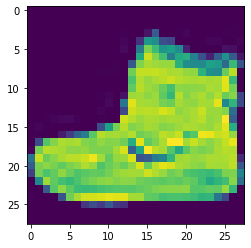

In [9]:
plt.imshow(img)

Text(0.5, 1.0, '9')

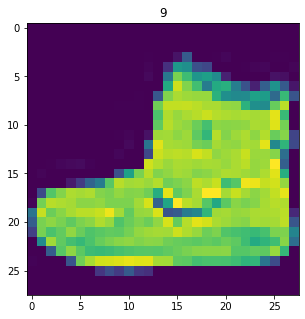

In [10]:
plt.figure(figsize=(5,5))
plt.imshow(img)
plt.title(train_label[0])

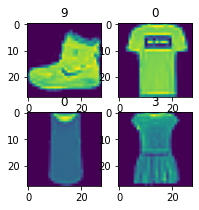

In [11]:
fig,ax = plt.subplots(nrows=2, ncols=2,figsize=(3,3))
#fig,ax = plt.subplots(nrows=2, ncols=2,figsize=(30,30))
ax[0][0].imshow(train_images[0])
ax[0][0].set_title(train_label[0])
ax[0][1].imshow(train_images[1])
ax[0][1].set_title(train_label[1])
ax[1][0].imshow(train_images[2])
ax[1][0].set_title(train_label[2])
ax[1][1].imshow(train_images[3])
ax[1][1].set_title(train_label[3])

fig.subplots_adjust(left=None,
                    bottom=None,
                    right=None,
                    top=None,
                    wspace=None,
                    hspace = None)
plt.show()


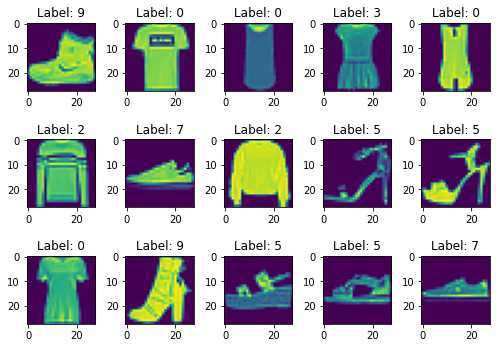

In [12]:
fig, axes = plt.subplots(3, 5, figsize=(7,5))
for i in range(15):
    ax = axes[i//5, i%5]
    ax.imshow(train_images[i])
    ax.set_title('Label: {}'.format(train_label[i]))
plt.tight_layout()
plt.show()

In [14]:
print(train_images[0]/255)

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.00392157 0.    

In [15]:
train_images = train_images/255
test_images = test_images/255

In [16]:
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                   tf.keras.layers.Dense(128,activation=tf.nn.relu),
                                   tf.keras.layers.Dense(10,activation=tf.nn.softmax)])

In [17]:
inputs = np.array([[1.0, 3.0, 4.0, 2.0]])
inputs = tf.convert_to_tensor(inputs)
print(f'input to softmax function: {inputs.numpy()}')

input to softmax function: [[1. 3. 4. 2.]]


In [18]:
model.compile(optimizer=tf.optimizers.Adam(),loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

In [19]:
model.fit(train_images,train_label,epochs=9)

Epoch 1/9
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4955 - accuracy: 0.8252
Epoch 2/9
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3739 - accuracy: 0.8651
Epoch 3/9
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3364 - accuracy: 0.8770
Epoch 4/9
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3114 - accuracy: 0.8838
Epoch 5/9
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2915 - accuracy: 0.8923
Epoch 6/9
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2797 - accuracy: 0.8964
Epoch 7/9
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2660 - accuracy: 0.9008
Epoch 8/9
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2571 - accuracy: 0.9038
Epoch 9/9
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2482 - accuracy: 0.9068


In [20]:
model.evaluate(test_images,test_label)

313/313 [==============================] - 1s 2ms/step - loss: 0.3388 - accuracy: 0.8784


[0.33882591128349304, 0.8784000277519226]

In [24]:
predict = model.predict(test_images)

In [27]:
print(max(predict[0]))

0.98093927


In [31]:
print(np.where(predict[0]==0.98093927))


(array([9]),)


In [32]:

print(test_label[0])

9


9


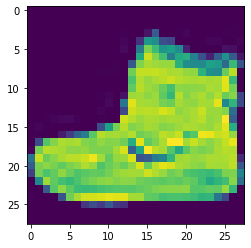

In [33]:
plt.imshow(train_images[0])
print(train_label[0])

In [34]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self,epoch,logs={}):
    if(logs.get('accuracy')>0.80):
      print('canceling training')
      self.model.stop_training = True

In [35]:
callbacks = myCallback()

In [36]:
# adding more neuron 

callbacks = myCallback()

minst = tf.keras.datasets.fashion_mnist
(training_images,training_label),(testing_images, testing_label)=minst.load_data()
training_images= training_images/255.0
testing_images = testing_images/255.0
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(1024,activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10,activation= tf.nn.softmax)])
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss="sparse_categorical_crossentropy",
              metrics = ['accuracy'])
model.fit(training_images,training_label,epochs=5,callbacks=[callbacks])

Epoch 1/5
1875/1875 [==============================] - 16s 8ms/step - loss: 0.4696 - accuracy: 0.8308


In [37]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy') >= 0.830): # Experiment with changing this value
      print("\nReached 60% accuracy so cancelling training!")
      self.model.stop_training = True

callbacks = myCallback()
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images=training_images/255.0
test_images=test_images/255.0
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=5, callbacks=[callbacks])


Epoch 1/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.4767 - accuracy: 0.8296
Epoch 2/5
1866/1875 [============================>.] - ETA: 0s - loss: 0.3596 - accuracy: 0.8686
Reached 60% accuracy so cancelling training!
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3595 - accuracy: 0.8686


In [46]:
# using convolutaion

model = tf,keras.models.Sequential([
                                   # tf.keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)),
                                    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
                                    #tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    #tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
                                    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
                                    #tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    
                                    
 
                                    
                                    #tf.keras.layers.Flatten(),
                                    tf.keras.layers.Flatten(),
                                    #tf.keras.layers.Dense(128,activation='relu'),
                                    tf.keras.layers.Dense(128, activation='relu'),
                                    #tf.keras.layers.Dense(10,activation='softmax')
                                    tf.keras.layers.Dense(10, activation='softmax')
])

model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_11 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 13, 13, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_12 (Conv2D)          (None, 11, 11, 32)        9248      
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 5, 5, 32)         0         
 g2D)                                                            
                                                                 
 flatten_8 (Flatten)         (None, 800)               0         
                                                                 
 dense_16 (Dense)            (None, 128)              

In [41]:
model.summary()

AttributeError: ignored

In [42]:
# Define the model
model = tf.keras.models.Sequential([
                                                         
  # Add convolutions and max pooling
  tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),

  # Add the same layers as before
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

# Print the model summary
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 11, 11, 32)        9248      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 flatten_4 (Flatten)         (None, 800)               0         
                                                                 
 dense_8 (Dense)             (None, 128)              